In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing Libraries

In [58]:
import numpy as np # linear algebra
import csv
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("display.max_rows",None) #full dataset loading in notebook view
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
print(sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

1.2.2


# 2. Importing Dataset

In [7]:
df = pd.read_csv('/content/sample_data/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# 3. Dataset Description

df.info() #short info of the dataframe
df.size #no of elements in dataframe =rows*column (m*n)


In [8]:
df.shape #print no of rows and columns

(918, 12)

In [9]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)

dataset_description(df)


No. of Columns in DataFrame:  12

Column attribute Names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Column in DataFrame:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Column in DataFrame:  5

Categorical Column Names:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [10]:
df.isnull().sum() #checking the null values present in the DataFrame


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.nunique() #number of unique values found in the DataFrame of each column


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [12]:
df.describe().T #printing statistics


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
# Convert categorical variables to numeric using one-hot encoding
df_numeric = pd.get_dummies(df)

# Now calculate the correlation matrix
corr_matrix = df_numeric.corr()  #tells corelation between columns of dataframe
print(corr_matrix)

                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_F             -0.055750  -0.005133     0.200092  -0.120076  0.189186   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ASY  0.166607   0.048824    -0.120531   0.131176 -0.354963   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.134580   
ChestPainTyp

In [14]:
# Calculate skewness only for numeric data
numeric_data = df.select_dtypes(include=[np.number])
skewness = numeric_data.skew()
print(skewness)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64


# 4. Data Visualization

In [15]:
# print(plt.style.available)

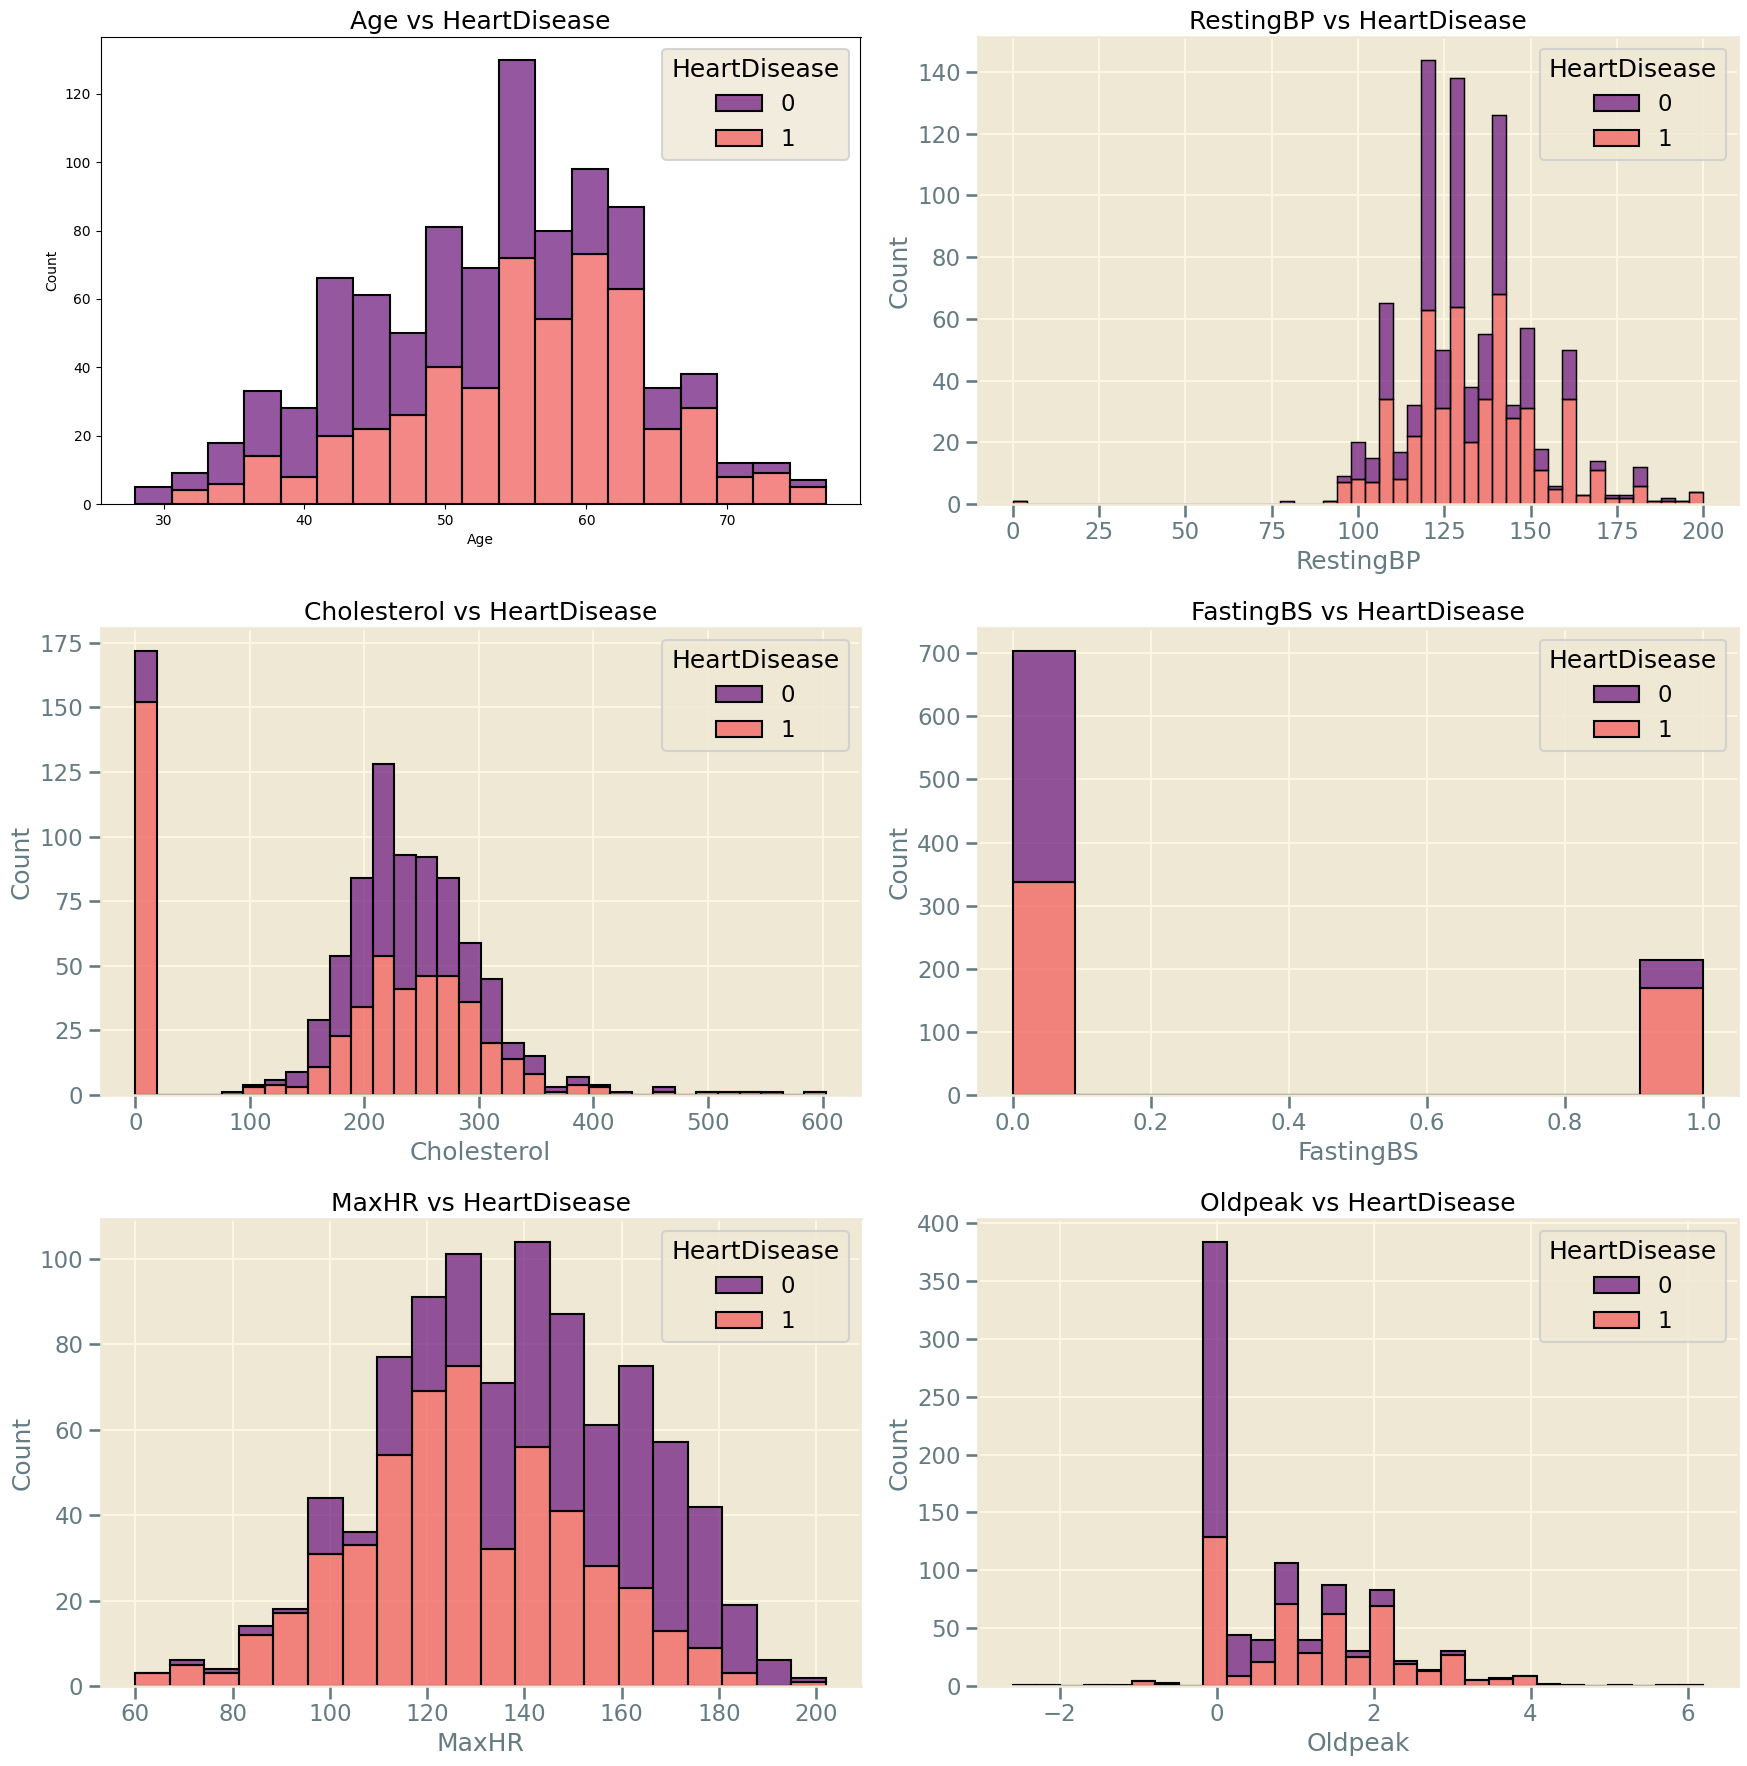

In [16]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

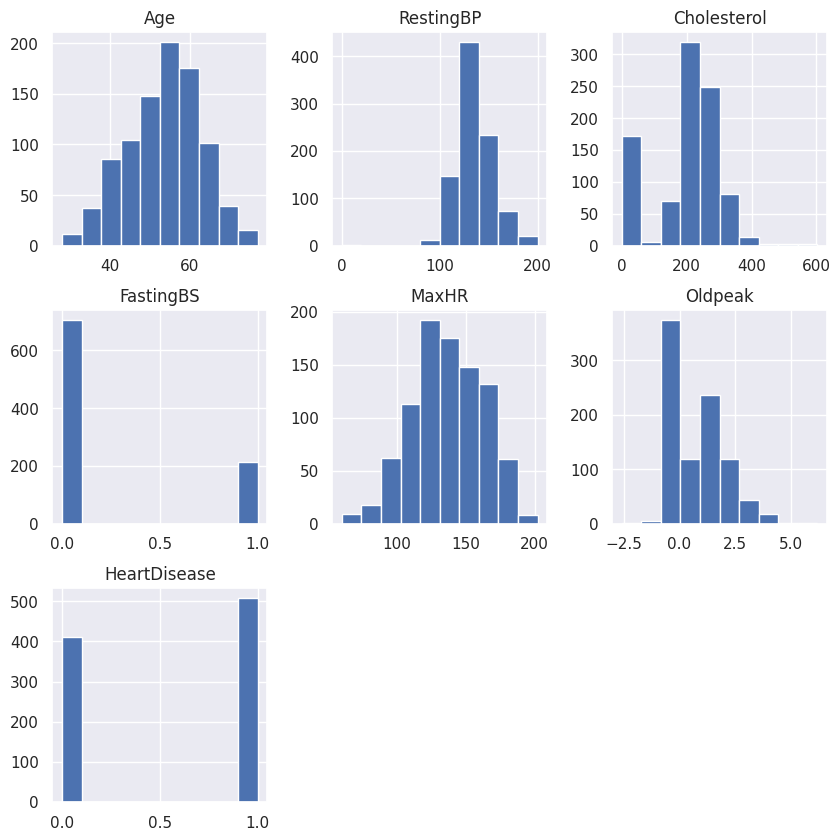

In [17]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.set()
df.hist(figsize=(10,10))
plt.show()

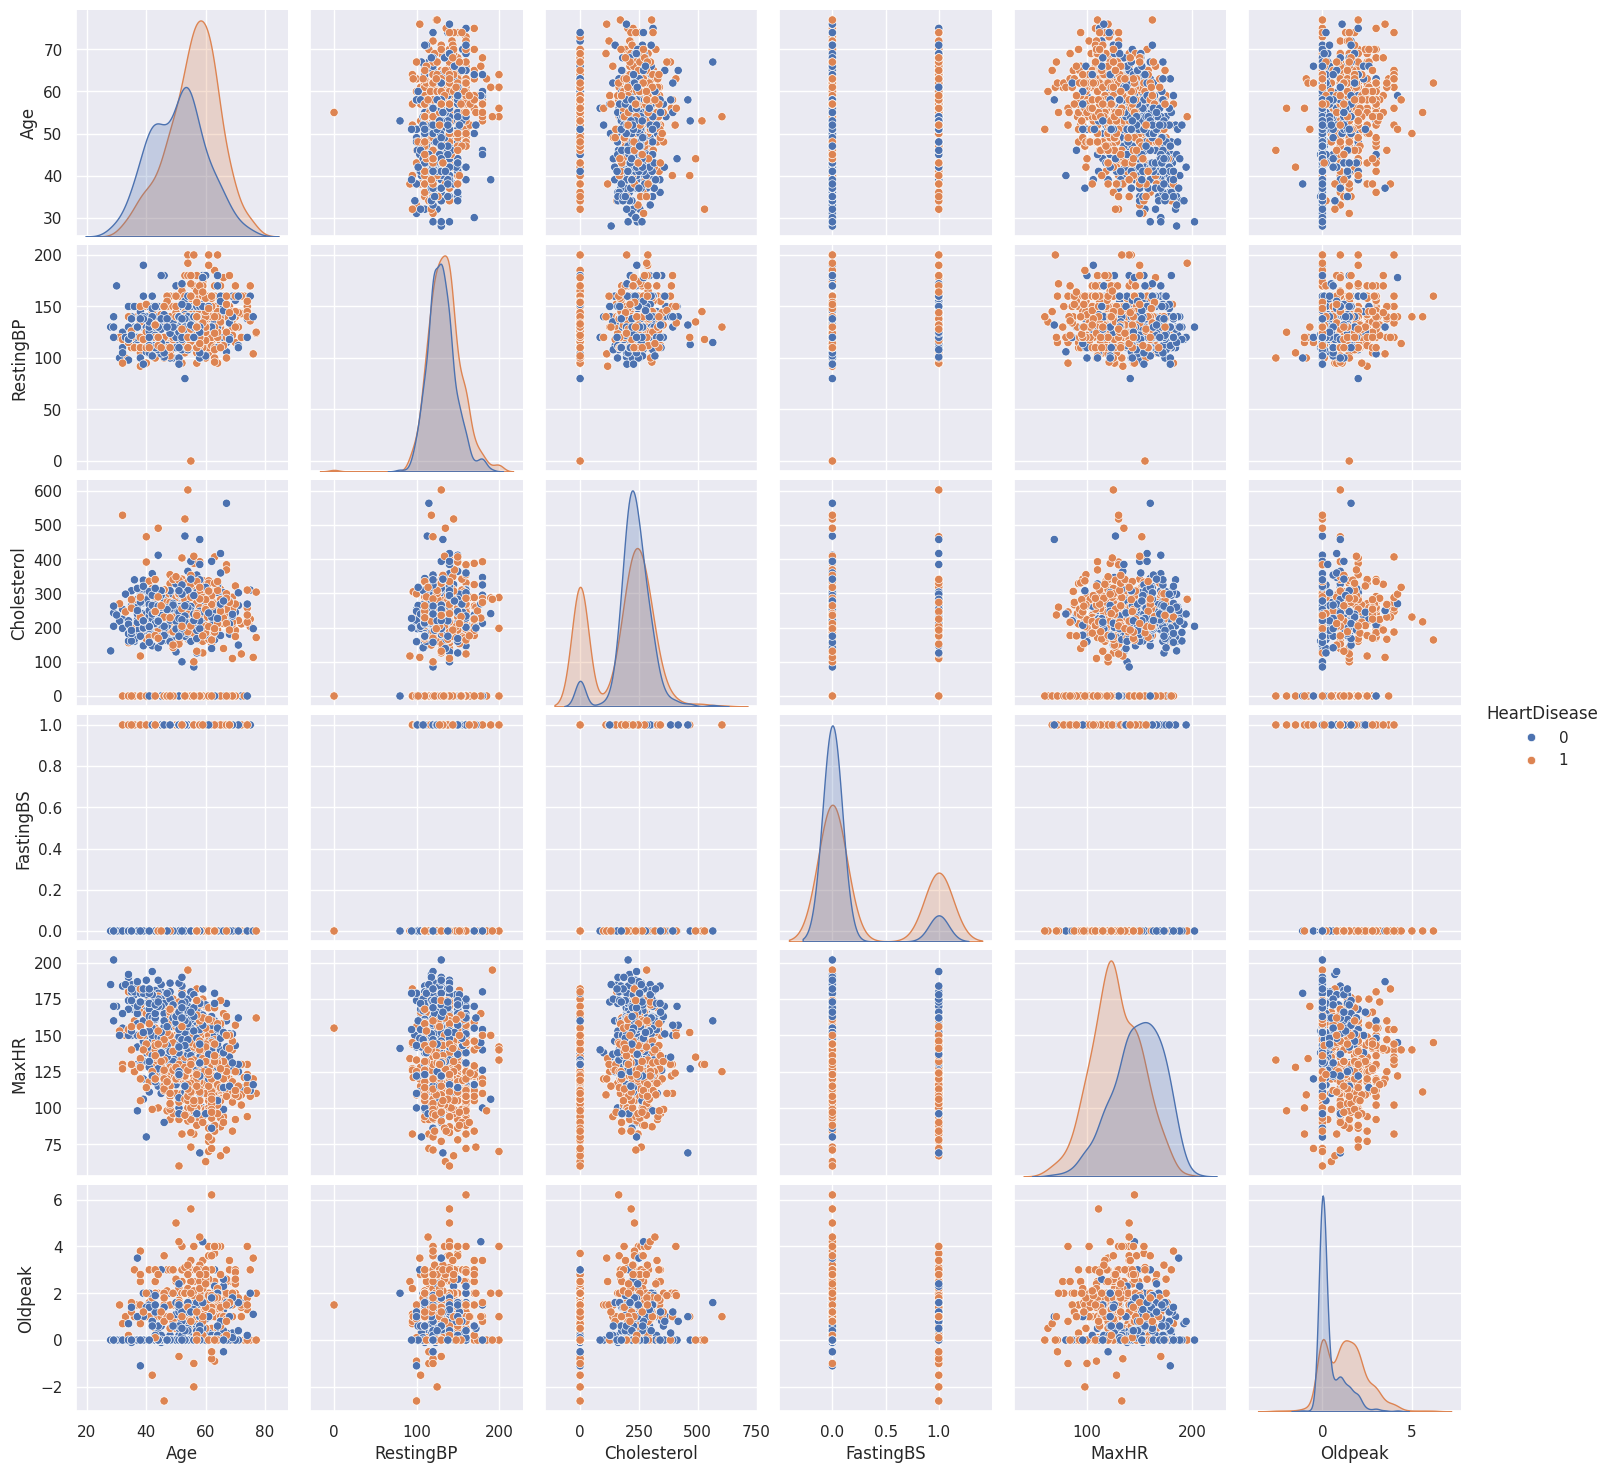

In [18]:
#sns.pairplot(df,hue='HeartDisease')

df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now use seaborn's pairplot
g = sns.pairplot(df, hue='HeartDisease')
plt.show()


In [19]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1
# average age is same for both male and female

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


In [20]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

# 5. Data Preprocessing

In [21]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25])
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [22]:
outliers_graph(df['Age'])

Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [23]:
outliers_graph(df['RestingBP'])


Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26


In [24]:
df=df[df.RestingBP>=90]
len(df)

916

In [25]:
outliers_graph(df['Cholesterol'])

Q25:  174.75
Q75:  267.0
Inter Quartile Range:  92.25
Outliers lie before 36.375 and beyond 405.375
Number of Rows with Left Extreme Outliers: 170
Number of Rows with Right Extreme Outliers: 12


In [26]:
df=df[df.Cholesterol<=450]  #due more value in the right extreme outlier and '0' cholesterol level in dataset
len(df)


908

In [27]:
outliers_graph(df['FastingBS'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 211


In [28]:
outliers_graph(df['MaxHR'])



Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0


In [29]:
df=df[df.MaxHR>=70]
len(df)

905

In [30]:
outliers_graph(df['Oldpeak'])

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 15


In [31]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  197.12817679558012
Median:  222.0


In [32]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  241.7357723577236


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,905.0,53.522652,9.434672,28.0,47.0,54.0,60.0,77.0
RestingBP,905.0,132.632044,17.989810,92.0,120.0,130.0,140.0,200.0
Cholesterol,905.0,197.128177,105.005105,0.0,175.0,222.0,266.0,417.0
FastingBS,905.0,0.232044,0.422370,0.0,0.0,0.0,0.0,1.0
MaxHR,905.0,137.101657,25.156164,70.0,120.0,138.0,156.0,202.0
Oldpeak,905.0,0.889834,1.070970,-2.6,0.0,0.6,1.5,6.2
HeartDisease,905.0,0.551381,0.497628,0.0,0.0,1.0,1.0,1.0


## 5.1. One Hot Encoding

In [34]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True)
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull')
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)


In [35]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,False,False,True,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,False,False,True,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,False,True,False,True,True,False,False,False,True


In [36]:
def preprocess_input(new_data):
    # Column names from your X_train
    columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
               'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M',
               'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
               'ST_Slope_Flat', 'ST_Slope_Up']

    # Initialize a dictionary to hold the processed form of the input data
    processed_data = {col: 0 for col in columns}  # start with zeros

    # Manually set the values based on the input
    processed_data['Age'] = new_data['Age']
    processed_data['RestingBP'] = new_data['RestingBP']
    processed_data['Cholesterol'] = new_data['Cholesterol']
    processed_data['FastingBS'] = new_data['FastingBS']
    processed_data['MaxHR'] = new_data['MaxHR']
    processed_data['Oldpeak'] = new_data['Oldpeak']

    # One-hot encode categorical data manually
    processed_data[f'ChestPainType_{new_data["ChestPainType"]}'] = 1
    processed_data['Sex_M'] = 1 if new_data['Sex'] == 'M' else 0
    processed_data[f'RestingECG_{new_data["RestingECG"]}'] = 1
    processed_data['ExerciseAngina_Y'] = 1 if new_data['ExerciseAngina'] == 'Y' else 0
    processed_data[f'ST_Slope_{new_data["ST_Slope"]}'] = 1

    # Convert the dictionary to a DataFrame
    new_data_df = pd.DataFrame([processed_data], columns=columns)

    return new_data_df


In [37]:
df.describe().columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

## 5.2. Imputation

In [38]:
#Zero value of cholesterol are filled usnig KNNImputer
from sklearn.impute import KNNImputer
df['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']=Cholesterol

In [39]:
import pandas as pd

def preprocess_input(user_input):
    # Convert user input into DataFrame format expected by the model
    columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
               'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
    input_df = pd.DataFrame([user_input], columns=columns)

    # Mapping and encoding here to fit the preprocessed format of X_train
    # For instance, mapping 'M'/'F' to 'Sex_M', etc.
    processed_df = pd.DataFrame(index=[0], columns=X_train.columns)
    processed_df.fillna(0, inplace=True)  # Initialize with zeros

    # Fill numeric data directly
    processed_df['Age'] = input_df['Age']
    processed_df['RestingBP'] = input_df['RestingBP']
    processed_df['Cholesterol'] = input_df['Cholesterol']
    processed_df['FastingBS'] = input_df['FastingBS']
    processed_df['MaxHR'] = input_df['MaxHR']
    processed_df['Oldpeak'] = input_df['Oldpeak']

    # Encode categorical data
    processed_df['Sex_M'] = (input_df['Sex'] == 'M').astype(int)
    processed_df['ExerciseAngina_Y'] = (input_df['ExerciseAngina'] == 'Y').astype(int)

    # Encoding other categorical fields similarly
    # Example for 'ChestPainType'
    pain_types = ['ATA', 'NAP', 'TA']  # Extend as necessary
    for pain_type in pain_types:
        processed_df[f'ChestPainType_{pain_type}'] = (input_df['ChestPainType'] == pain_type).astype(int)

    return processed_df


In [40]:
print(df.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


# 6. Feature Scaling

In [41]:
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]

# printing the altered DataFrame
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,True,False,False,True,True,False,False,False,True,0
1,49,160,180.0,0,156,1.0,False,True,False,False,True,False,False,True,False,1
2,37,130,283.0,0,98,0.0,True,False,False,True,False,True,False,False,True,0
3,48,138,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False,1
4,54,150,195.0,0,122,0.0,False,True,False,True,True,False,False,False,True,0


In [42]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [43]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.434086,0.409789,0.980973,-0.549689,1.388035,-0.831327,2.064371,-0.532624,-0.23141,0.517211,0.820261,-0.493084,-0.825927,-0.996691,1.141402
1,-0.479630,1.522144,-1.278327,-0.549689,0.751656,0.102922,-0.484409,1.877498,-0.23141,-1.933448,0.820261,-0.493084,-0.825927,1.003320,-0.876115
2,-1.752238,-0.146388,0.856608,-0.549689,-1.555216,-0.831327,2.064371,-0.532624,-0.23141,0.517211,-1.219124,2.028052,-0.825927,-0.996691,1.141402
3,-0.585681,0.298554,-0.573591,-0.549689,-1.157480,0.570047,-0.484409,-0.532624,-0.23141,-1.933448,0.820261,-0.493084,1.210760,1.003320,-0.876115
4,0.050623,0.965967,-0.967414,-0.549689,-0.600648,-0.831327,-0.484409,1.877498,-0.23141,0.517211,0.820261,-0.493084,-0.825927,-0.996691,1.141402


# 7. Featured Selection

In [44]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [45]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# 8. Predicting Using KNN, Linear Regression, Voting Classifier, Random Forest


# K value estimation

In [47]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.23348017621145375
2 0.27312775330396477
3 0.13215859030837004
4 0.19823788546255505
5 0.14096916299559473
6 0.1762114537444934
7 0.14096916299559473
8 0.15859030837004406
9 0.14096916299559473
10 0.14537444933920704
11 0.1277533039647577
12 0.14096916299559473
13 0.1277533039647577
14 0.13656387665198239
15 0.13656387665198239
16 0.13215859030837004
17 0.13656387665198239
18 0.13656387665198239
19 0.1277533039647577
20 0.13656387665198239
21 0.13215859030837004
22 0.1277533039647577
23 0.13215859030837004
24 0.13656387665198239
25 0.13656387665198239
26 0.13215859030837004
27 0.13215859030837004
28 0.12334801762114538
29 0.11894273127753303
30 0.12334801762114538
31 0.12334801762114538
32 0.1277533039647577
33 0.11894273127753303
34 0.11894273127753303
35 0.1145374449339207
36 0.11013215859030837
37 0.1145374449339207
38 0.1145374449339207
39 0.1145374449339207


Text(0, 0.5, 'Error Rate')

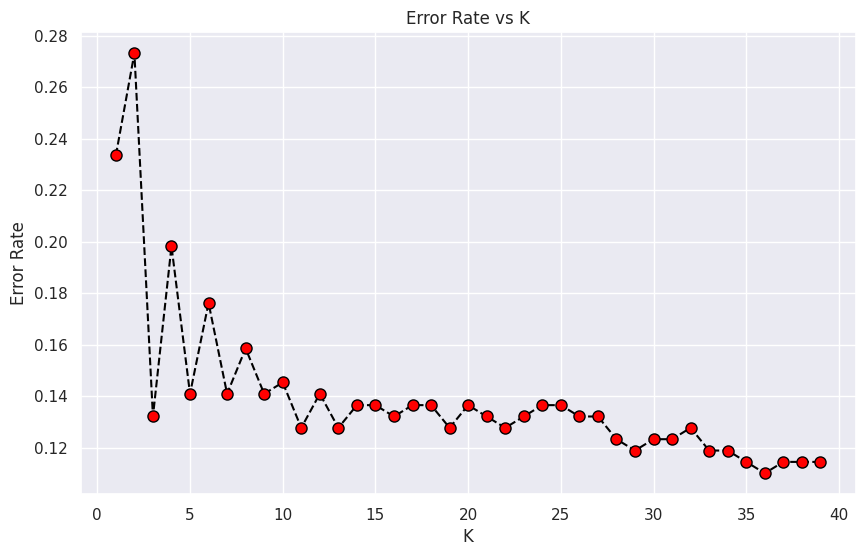

In [48]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

# KNN model

In [50]:
from sklearn.impute import KNNImputer

# Assuming that you need to impute missing values in your dataset
# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=36)  # You can adjust the number of neighbors based on your dataset

# Fit the imputer on the training data (X_train)
knn_imputer.fit(X_train)


KNNImputer(n_neighbors=36)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        94
           1       0.90      0.91      0.91       133

    accuracy                           0.89       227
   macro avg       0.89      0.89      0.89       227
weighted avg       0.89      0.89      0.89       227



------------------------
Confusion Matrix
------------------------



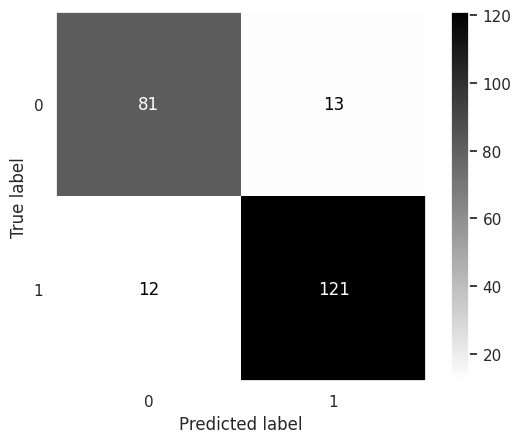

Accuracy of KNN: 0.890
The model predicts this person is not at risk of heart failure.
Accuracy of KNN: 0.861 (0.032)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Initialize and train the classifier
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)

# Step 2: Evaluate the classifier with the test data
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.3f}")


# Assuming new_patient_data is already collected and formatted as:
# [age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]

# Step 3: Preprocess the new patient data
# Make sure that preprocess_input is correctly defined and used here
processed_new_patient = preprocess_input(new_patient_data)

# Predicting the risk of heart failure
risk_prediction = classifier.predict(processed_new_patient)

# Step 4: Output the prediction result for the new patient
if risk_prediction[0] == 1:
    print("The model predicts this person is at risk of heart failure.")
else:
    print("The model predicts this person is not at risk of heart failure.")


scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [52]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87        94
           1       0.90      0.91      0.91       133

    accuracy                           0.89       227
   macro avg       0.89      0.89      0.89       227
weighted avg       0.89      0.89      0.89       227



# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression



# Step 1: Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 2: Evaluate the model with the test data
y_pred_lr = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Use a threshold to classify predictions
threshold = 0.5  # Example threshold
classified_preds = [1 if x >= threshold else 0 for x in y_pred_lr]

classification_accuracy = accuracy_score(y_test, classified_preds)
print("Classification Accuracy:", classification_accuracy)

# Step 3: Preprocess the new patient data
processed_new_patient = preprocess_input(new_patient_data)

# Predicting the risk of heart failure
predicted_risk_score = linear_model.predict(processed_new_patient)
predicted_risk = 1 if predicted_risk_score >= threshold else 0

# Step 4: Output the prediction result for the new patient
if predicted_risk == 1:
    print("The model predicts this person is at risk of heart failure.")
else:
    print("The model predicts this person is not at risk of heart failure.")



Mean Squared Error: 0.10937741031942676
R2 Score: 0.5491834445408943
Classification Accuracy: 0.8546255506607929
The model predicts this person is not at risk of heart failure.


# Voting Classifier

Accuracy of Voting Classifier: 0.8678414096916299
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        94
           1       0.90      0.87      0.89       133

    accuracy                           0.87       227
   macro avg       0.86      0.87      0.86       227
weighted avg       0.87      0.87      0.87       227



------------------------
Confusion Matrix
------------------------



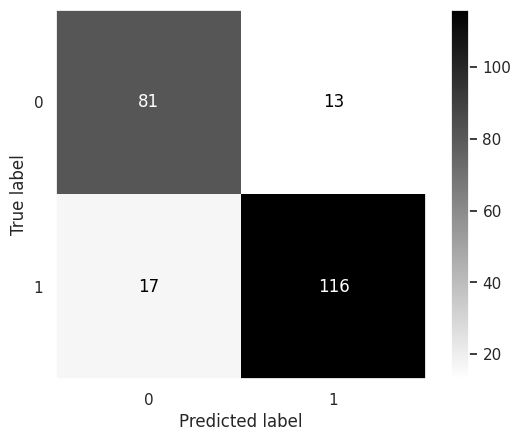

Voting Classifier Prediction for new patient: Not at risk


In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a voting classifier that combines KNN and Logistic Regression
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),  # Ensuring sufficient iterations for convergence
        ('knn', KNeighborsClassifier(n_neighbors=36))
    ],
    voting='hard'  # 'hard' voting uses predicted class labels for majority rule voting
)

# Train the classifier
voting_clf.fit(X_train, y_train)

# Evaluate the classifier with the test data
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy of Voting Classifier:", accuracy_voting)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_voting))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')

cm_voting = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_voting)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()

# Assuming preprocess_input and processed_new_patient are defined
# Make a prediction using the voting classifier for a new patient
voting_prediction = voting_clf.predict(processed_new_patient)
print("Voting Classifier Prediction for new patient:", "At risk" if voting_prediction[0] == 1 else "Not at risk")


# Random Forest Classifier

Accuracy of RandomForest: 0.8810572687224669
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        94
           1       0.89      0.91      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.88      0.88       227
weighted avg       0.88      0.88      0.88       227



------------------------
Confusion Matrix
------------------------



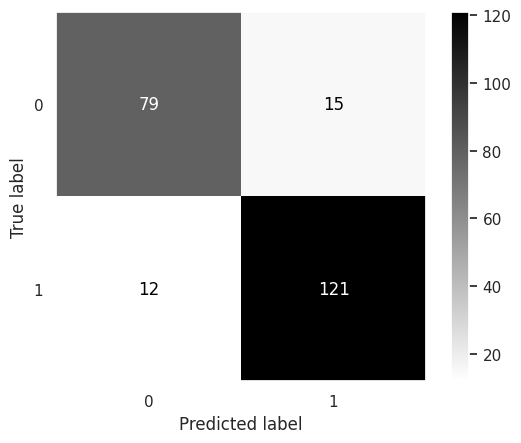

The model predicts this person is at risk of heart failure.
Accuracy of KNN: 0.861 (0.048)


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Initialize and train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 2: Evaluate the classifier with the test data
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="binary")
plt.grid(False)
plt.show()

# Step 3: Preprocess the new patient data
processed_new_patient_rf = preprocess_input(new_patient_data)

# Predicting the risk of heart failure
risk_prediction_rf = rf_classifier.predict(processed_new_patient_rf)

# Step 4: Output the prediction result for the new patient
if risk_prediction_rf[0] == 1:
    print("The model predicts this person is at risk of heart failure.")
else:
    print("The model predicts this person is not at risk of heart failure.")


scores = cross_val_score(rf_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# Making a Decision

In [56]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_probs = rf_classifier.predict_proba(processed_new_patient)[0]
print("Random Forest Prediction Probabilities:", rf_probs)

# Voting Classifier with 'soft' voting (make sure all estimators can provide probabilities)
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=36))
], voting='soft')  # 'soft' voting to get probabilities
voting_clf.fit(X_train, y_train)
voting_probs = voting_clf.predict_proba(processed_new_patient)[0]
print("Voting Classifier Prediction Probabilities:", voting_probs)

# K-Nearest Neighbors Model
knn_classifier = KNeighborsClassifier(n_neighbors=36)
knn_classifier.fit(X_train, y_train)
knn_probs = knn_classifier.predict_proba(processed_new_patient)[0]
print("KNN Prediction Probabilities:", knn_probs)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Linear Regression
linear_preds = linear_model.predict(processed_new_patient)

# Convert predictions to a 'probability' using a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

linear_probs = sigmoid(linear_preds)
print("Linear Regression 'Probabilities':", linear_probs)

Random Forest Prediction Probabilities: [0.4 0.6]
Voting Classifier Prediction Probabilities: [0.6612408 0.3387592]
KNN Prediction Probabilities: [0.66666667 0.33333333]
Linear Regression 'Probabilities': [0.44836622]
